In [22]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
a = tf.constant(1.)
b = tf.constant(2.)
print(a+b)
print('GPU:', tf.test.is_gpu_available())


module 'tensorflow_core._api.v2.config' has no attribute 'set_visible_devices'
tf.Tensor(3.0, shape=(), dtype=float32)
GPU: True


In [19]:
from tensorflow import keras
from tensorflow.keras import layers
 
cifar = keras.datasets.cifar10
 
(train_image, train_label), (test_image, test_label) = cifar.load_data()
 
train_image.shape, test_image.shape
 
train_label
 
# 归一化处理
train_image = train_image/255
test_image = test_image/255
 
model = keras.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (1, 1), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))          
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())  
model.add(layers.Dropout(0.5))         
model.add(layers.Dense(10, activation='softmax'))
 
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_12 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 128)      

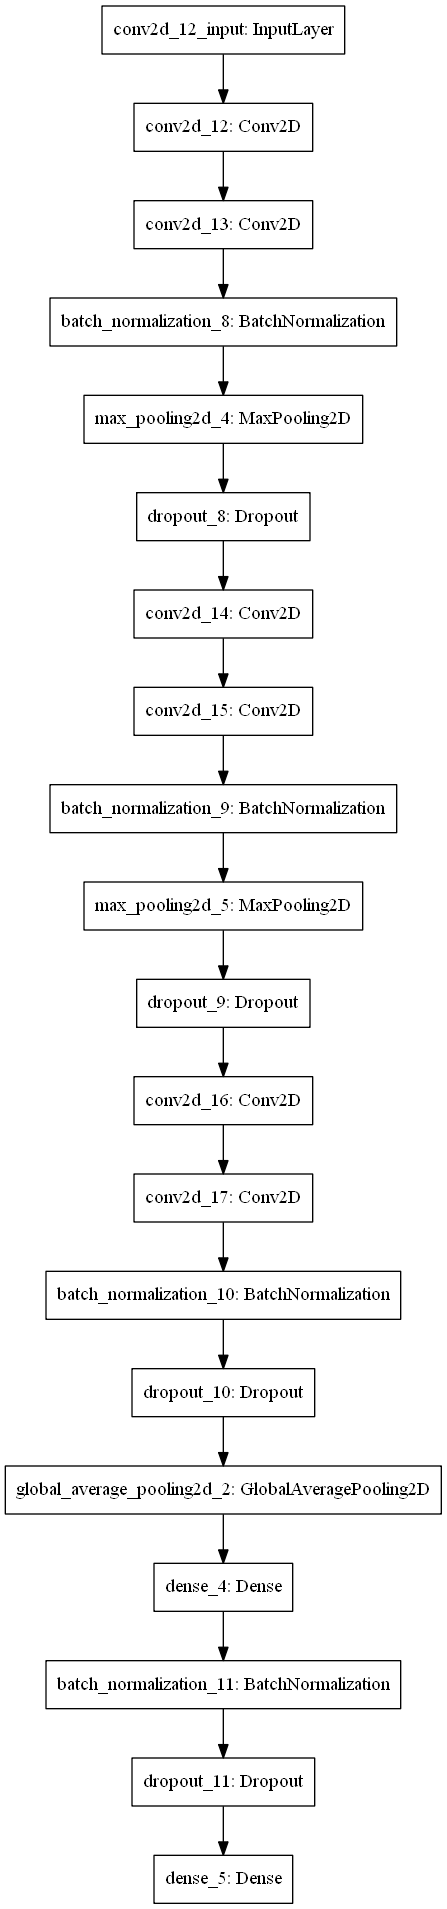

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model)


In [24]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
              )
 
history = model.fit(train_image, train_label, epochs=30, batch_size=128)
 
model.evaluate(test_image, test_label)



Train on 50000 samples
Epoch 1/30
50000/50000 [==============================] - 8s 158us/sample - loss: 0.3983 - acc: 0.8625
Epoch 2/30
50000/50000 [==============================] - 6s 129us/sample - loss: 0.3582 - acc: 0.8772
Epoch 3/30
50000/50000 [==============================] - 6s 128us/sample - loss: 0.3367 - acc: 0.8847
Epoch 4/30
50000/50000 [==============================] - 6s 129us/sample - loss: 0.3103 - acc: 0.8920
Epoch 5/30
50000/50000 [==============================] - 6s 129us/sample - loss: 0.2951 - acc: 0.8956
Epoch 6/30
50000/50000 [==============================] - 7s 130us/sample - loss: 0.2785 - acc: 0.9041
Epoch 7/30
50000/50000 [==============================] - 6s 130us/sample - loss: 0.2647 - acc: 0.9082
Epoch 8/30
50000/50000 [==============================] - 7s 131us/sample - loss: 0.2465 - acc: 0.9143
Epoch 9/30
50000/50000 [==============================] - 6s 129us/sample - loss: 0.2384 - acc: 0.9160
Epoch 10/30
50000/50000 [=========================

NameError: name 'plt' is not defined

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.show()

# Data

CIFAR10

![](https://pic3.zhimg.com/v2-eaf61f75f8e4ae30ec2fab8b61ba70aa_1440w.jpg?source=172ae18b)

- CIFAR10数据集共有60000张彩色图像，这些图像式32 * 32 * 3，分为10个类，每个类6000张

Downloading data from https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
126443520/170498071 [=====================>........] - ETA: 12s


# Debug

[Setting Up Run by Line and Debugging for Notebooks](https://github.com/microsoft/vscode-jupyter/wiki/Setting-Up-Run-by-Line-and-Debugging-for-Notebooks)

```
pip install -U ipykernel
```

# GPU
配置
https://www.tensorflow.org/install/gpu#pip_package

如果显存不足或者代码中模型没有充分优化，可以设置按需增长的GPU显存

```
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)
```

https://zhuanlan.zhihu.com/p/95065951

GPU
60000/60000 [==============================] - 10s 169us/sample - loss: 2.2810 - accuracy: 0.1306

CPU
60000/60000 [==============================] - 52s 872us/sample - loss: 2.2857 - accuracy: 0.1371